課題１　分散は平均値からどれだけ差があるかの偏差を二乗したものを足し合わせたものの平均をとったもの。これは平均と各値との差は全部足し合わせると打ち消しあうので便宜上
二乗しているがこれだと元の単位との整合性が取れないので分散の平方根をとって元のデータの値に単位を戻している

共分散は２変数の偏差の積の平均を出したもので＋の時片方に値が正ならもう片方も正になり
➖なら負になる確率が高くなる

1次元の正規分布 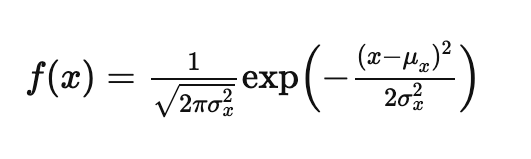　　の数式において平均が０標準偏差が１のものを指す。



確率変数
xi (i=1,...,N)
正規分布は確率分布であると考える。この確率変数は全て、独立に標準正規分布に従うとすると多次元の正規分布はお互いの次元が独立である場合、多次元の正規分布はその次元数だけ１次元の正規分布を掛け合わせる。という式になる。

主な使い方は特徴量の標準化の時に使う。例えば２種類の特徴量がありお互いの単位が大きく開く時大きい方の特徴量にパラメータが影響を強く受けてしまう。それを正規分布に変換して特徴量の最大から最小までの分布全体が１になるようにすれば同じ尺度で特徴量を捉えることができるようになる。

あと
https://qiita.com/kilometer/items/6ab1d7f2cffc0c6e4a95
のようにサンプル数が少ない時の予測にも使える。マクロ的な見方をすれば自然現象は正規分布に近似するので。

In [19]:
#coding:utf-8

import numpy as np
import matplotlib.pyplot as plt

In [20]:
np.set_printoptions(threshold=3000)
#平均
mu1 = [-3,0]
mu2 = [0,-3]
#共分散
cov = [[1.0,0.8],[0.8,1.0]]

In [21]:
#500はデータ数
data1 = np.random.multivariate_normal(mu1,cov,500)
data2 = np.random.multivariate_normal(mu2,cov,500)

In [22]:
concat_data = np.concatenate([data1,data2])
#0次元のnumpy配列を０で初期化
#0次元のnumpy配列を１で初期化
data_mark_0 = np.full(500, 0)
data_mark_1 = np.full(500, 1)
#ラベル０、１のデータを５００個ずつ縦に結合
concat_mark_data = np.concatenate([data_mark_1,data_mark_0]).reshape(1000,1)
#concat_dataにラベルデータを横に結合
concat_data1 = np.insert(concat_data, [2], concat_mark_data, axis=1)

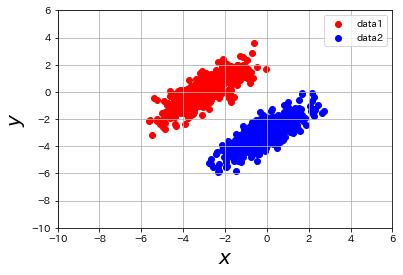

In [23]:
data_X_1 = concat_data1[concat_data1[:,2] == 1][:,0]
data_y_1 = concat_data1[concat_data1[:,2] == 1][:,1]
data_X_0 = concat_data1[concat_data1[:,2] == 0][:,0]
data_y_0 = concat_data1[concat_data1[:,2] == 0][:,1]
# #散布図をプロットする
plt.scatter(data_X_1,data_y_1,color='r',marker='o',label="data1")
plt.scatter(data_X_0,data_y_0,color='b',marker='o',label="data2")
# #ラベル
plt.xlabel('$x$',size=20)
plt.ylabel('$y$',size=20)
plt.axis([-10.0,6.0,-10.0,6.0],size=20)
plt.grid(True)
plt.legend()
plt.show()